# Aprendizado não supervisionado

Em aprendizagem não supervisionada, não existe uma etapa de teste no mesmo sentido em que ela aparece na aprendizagem supervisionada. Isso acontece porque, nesse tipo de modelo, os dados não possuem rótulos, ou seja, não há um “valor correto” com o qual comparar as saídas do algoritmo. Sem um gabarito, não faz sentido falar em erro de previsão ou em métricas clássicas como accuracy ou recall, que dependem diretamente desses rótulos.

O processo típico envolve o treino do modelo, no qual ele aprende a estrutura dos dados, como padrões, agrupamentos ou representações internas, e depois a aplicação desse modelo para atribuir novos dados a clusters, projetar dados em um novo espaço ou simplesmente analisar a estrutura encontrada. Em vez de treino e teste, costuma-se falar em treino e aplicação (ou predição/transformação).

Isso não significa que modelos não supervisionados não sejam avaliados. A avaliação existe, mas é indireta. Usam-se métricas internas que medem a qualidade da estrutura descoberta, como a coesão dos grupos e a separação entre eles, ou análises de estabilidade do modelo quando aplicado a diferentes subconjuntos de dados.

## Técnica 1: Estimação de densidade

A estimação de densidade é uma técnica de aprendizagem não supervisionada cujo objetivo é aproximar a distribuição de probabilidade subjacente aos dados, ou seja, estimar como os dados se distribuem no espaço sem assumir rótulos ou classes. Em vez de agrupar pontos ou reduzir dimensionalidade, a estimação de densidade tenta responder à pergunta: qual é a probabilidade de observar um dado ponto do espaço?

## Técnica 2: Modelos de clusterização

In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\alice\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\alice\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\alice\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\Users\alice\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "c:\Users\alice\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\alice\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alice\AppData\Local\Temp\ipykernel_19096\557109475.py", line 3, in <cell line: 3>
    import seaborn as sns
  File "c:\Users\alice\anaconda3\lib\site-packages\seaborn\__init__.py", line 2, in <module>
    from .rcmod import *  # noqa: F401,F403
  File "c:\Users\alice\anaconda3\lib\site-packages\seaborn\rcmod.py", line 5, in <module>
    import matplotlib as mpl
  File "c:\Users\alice\anaconda3\lib\site-packages\matplotlib\__init__.py", line 159, in <module>
    from . import _api, _version, cbook, _docstring, rcsetup
  File "c:\Users\alice\anaconda3\lib\site-packages\matplotlib\rcsetup.py", line 28, in <module>
    from matplotlib.colors import Colormap, is_color_like
  File "c:\Users\alice\anaconda3\lib\site-packages\matplotlib\colors.py", line 57, in <module>
    from matp

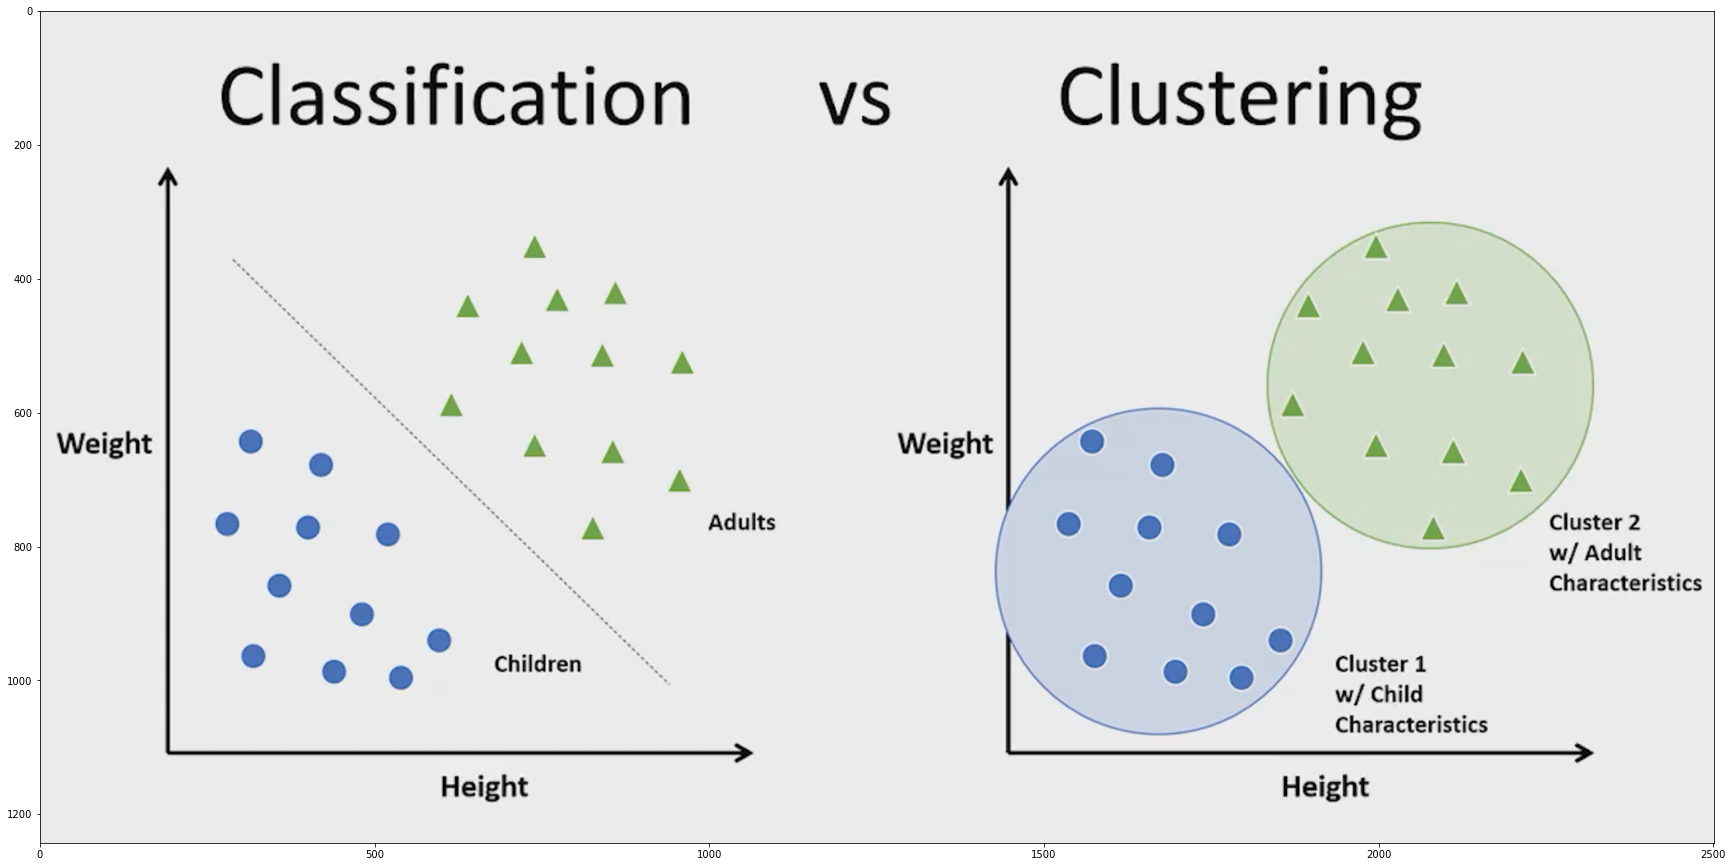

In [ ]:
im = plt.imread('./images/classification_clustering.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

**Como avaliar os clusters criados?**

* Qualidade dos grupos (medidas de distância, alta similaridade intra-grupos e baixa similaridade inter-grupos)
* Inspeção manual 
* Benchmarking (quando se conhece os grupos)

**Funções de distância na abordagem algébrica**
* atributos numéricos: distância euclidiana 
* atributos nominais: simple matching approach
* relevância dos atributos: ponderação


### 2.1 K-means

O k-means é um dos algoritmos mais populares de aprendizagem não supervisionada, usado principalmente para agrupamento (clustering) de dados. O algoritmo descobre sozinho os padrões e os grupos, sem saber previamente o que cada grupo representa.


Ele tenta responder à pergunta: *“Como posso dividir meus dados em k grupos de forma que os elementos dentro de cada grupo sejam o mais parecidos possível?”*

Onde k é um número escolhido antes de rodar o algoritmo (quantos clusters você quer).


Na prática:
1. Escolha de k: Define quantos clusters existirão (ex: k = 3).
2. Inicialização dos centróides: O algoritmo escolhe aleatoriamente k pontos (centróides).
3. Atribuição dos pontos: Cada ponto do conjunto de dados é associado ao centróide mais próximo (geralmente usando distância euclidiana).
4. Atualização dos centróides: Cada centróide passa a ser a média dos pontos do seu grupo.
5. Repetição: Os passos 3 e 4 se repetem até que os centróides praticamente não mudem mais.

**Outras abordagens:**
* k-medoids - utiliza a mediana e não a média, para não ficar sensível a outliers
* Usar amostragens para grandes bases de dados

In [ ]:
#Carrega dataset 
df = pd.read_csv(".\datasets\IMDB_movie_dataset.csv", encoding = 'utf-8')
df.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [ ]:
#Preparação de dados

#Dropando colunas desnecessárias
df.drop(['color','language'], axis= 1, inplace= True)

#Preenhce valores vazios de duas colunas numéricas: renda bruta (gross) e orçamento (budget) com 0's.
df['gross'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)

# Unifica valores de outras colunas, como país, nome do diretor ou título do filme.
# Colocando em maiúsculas todos os valores de países

df['country'] = df['country'].str.upper()
df['country'] = np.where(df['country']=='UNITED STATES','USA', df['country'])

#Visualiza resultado
df.head()

C:\Users\alice\AppData\Local\Temp\ipykernel_16316\1641984060.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gross'].fillna(0, inplace=True)
C:\Users\alice\AppData\Local\Temp\ipykernel_16316\1641984060.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [ ]:
# Checando por entradas truncadas de dados
# Troca N/A, NaN ou Null por vazio '' 

df['director_name'] = np.where(df['director_name']=='N/A','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='NaN','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Null','', df['director_name'])
df['movie_title'] = df['movie_title'].str.replace('Â', '')


In [ ]:
# De modo a normalizar os dados, dividimos os atores em três atributos diferentes
# e eliminamos a coluna real da seguinte forma:

actor_list = df['actors'].str.split(',',n=2 , expand = True)

df["actor1"]= actor_list[0]
df["actor2"]= actor_list[1]
df["actor3"]= actor_list[2]
df.drop(columns=['actors'], inplace=True)
df.head()

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,movie_facebook_likes,actor1,actor2,actor3
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,138000,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,95000,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,114000,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,0,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,83000,Aidan Turner,Adam Brown,James Nesbitt


In [ ]:
#remove outliers:
#a duração do filme em nosso conjunto de dados não pode ser inferior a 10 ou superior a 300 minutos
#para esses casos, preenchemos as células com valores zero.

df['duration'] = np.where(df['duration']<=10,0, df['duration'])
df['duration'] = np.where(df['duration']>300,0, df['duration'])

#Nota do IMDB não pode ser menor que 0 
df['imdb_score'] = np.where(df['imdb_score']<=0,0, df['imdb_score'])

#Ano do filme não pode ser igual ou anterior a 2010
df['title_year'] = np.where(df['title_year']<2010,0, df['title_year'])

In [ ]:
#definimos uma nova métrica chamada GOB que mostra o orçamento bruto acima do orçamento para cada filme:
# Adicione uma nova métrica GOB (Bruto acima do orçamento, Gross Over Budget)

df['GOB'] = df.apply(lambda row: row['gross']/row['budget'] if row['budget']!=0 else 0, axis=1)
top_GOB=df.sort_values('GOB',ascending=False).head(15)


In [ ]:
# Como temos os nomes completos dos diretores, adiciono outra coluna para encurtar seus 
#nomes para melhor visualizá-los em um gráfico.
# Pegamos a segunda parte do nome, que pode ser o sobrenome deles.

top_GOB['director_familyName'] = df["director_name"].str.split(" ", n = 2, expand = True) [1]


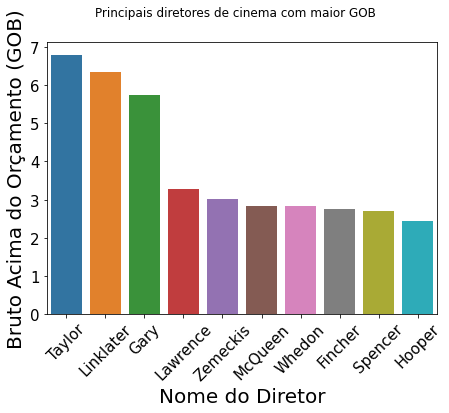

In [ ]:
fig,ax = plt.subplots(figsize=(7, 5))

# Desenhando um gráfico de barras
ax = sns.barplot(x='director_familyName', y='GOB', data=top_GOB)

# Girando o nome dos diretores em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Título do nosso gráfico
fig.suptitle('Principais diretores de cinema com maior GOB', fontsize=12)

# Definindo o nome e o tamanho da fonte do rótulo dos eixos x e y
ax.set_xlabel('Nome do Diretor',fontsize=20)
ax.set_ylabel('Bruto Acima do Orçamento (GOB)',fontsize=20)

# Definindo o tamanho do tick do eixo
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Mostra o gráfico
plt.show()

C:\Users\alice\AppData\Local\Temp\ipykernel_16316\2661335858.py:10: FutureWarning: The provided callable <function mean at 0x000002C130FF2C10> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)


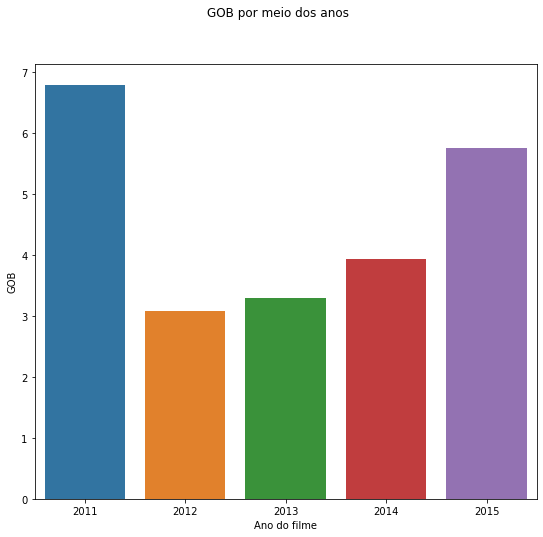

In [ ]:
# Vamos fazer uma análise de tendências baseada em Clustering?

# Qual ano teve o maior GOB?

# O próximo relatório mostra os anos com altas pontuações brutas acima do orçamento para todos os filmes.
# Para fazer isso, devemos agrupar os registros com base em title_year.
# A tabela dinâmica em Python é usada para agrupar colunas e agregá-las com base em colunas numéricas, conforme mostrado no código a seguir.

# Dados de GOB com base no ano do filme
dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)

# A coluna do ano no conjunto de dados inclui alguns valores ausentes, iremos ignorá-los.
# Algumas células estão vazias na coluna do ano
# dataset_pivot = dataset_pivot.loc[dataset_pivot['title_year'] > 0]

# Não precisamos do último registro que inclui a métrica de resumo
dataset_pivot = dataset_pivot[:-1]

# Como o índice mudou após a criação de uma tabela dinâmica, redefinimos o índice
dataset_pivot.reset_index(inplace=True)

# Algumas células estão vazias na coluna do ano
# dataset_pivot =dataset_pivot.loc[dataset_pivot['title_year']>0]

fig,ax = plt.subplots(figsize=(9, 8))
ax=sns.barplot(x="title_year", y="GOB", data=dataset_pivot)
fig.suptitle('GOB por meio dos anos', fontsize=12)
plt.xlabel('Ano do filme')
plt.show()

**Podemos agrupar os filmes com base em suas pontuações GOB/IMDB?**

Diante do que fizemos até agora, podemos escolher um algoritmo de clustering para encontrar grupos de dados. A escolha do algoritmo depende de vários fatores, incluindo a natureza dos dados, tamanho dos dados, número e tipos de recursos em nosso conjunto de dados, etc.

No exemplo, utilizaremos novamente o algoritmo K-Means, um dos algoritmos de cluster mais populares, que funciona iterativamente para atribuir cada ponto de dados a um dos 'K' grupos com base no
recursos que são fornecidos.

Em nosso conjunto de dados, procuramos uma relação entre uma pontuação GOB e IMDB para ver se podemos ou não agrupar filmes com base nessas duas métricas. Primeiro, precisamos especificar o número de clusters que procuramos.

No exemplo, iremos escolher três. Se você visualizar seus dados em um gráfico de dispersão, poderá deduzir o número de grupos que poderá obter do algoritmo, mas se não, não se preocupe. Você pode alterar o número de clusters posteriormente e executar o algoritmo novamente para ver se obtém um resultado melhor ou não!

Para tanto, acabei usando um gráfico de dispersão simples em Python para visualizar essas duas métricas (a pontuação GOB e IMDB) em um gráfico:

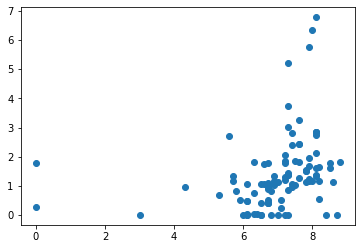

In [ ]:
plt.scatter(x=df['imdb_score'], y=df['GOB'])
plt.show()

In [ ]:
# Agora, vamos gerar clustering com três grupos.


# Excluindo os valores ausentes e selecionando apenas a pontuação GOB e IMDB

selected_dataset=df.loc[
(df['GOB']>0) & df['imdb_score']>0][['imdb_score','GOB']]

# Agrupando o conjunto de dados usando o algoritmo K-Means
cls = KMeans(n_clusters=3)

# Ajustar o modelo ao algoritmo
cls.fit(selected_dataset)

# Trazendo os centróides e o rótulo de cada grupo
centroids=cls.cluster_centers_
labels = cls.labels_

# centroids
# red = selected_dataset[labels == 1]
# red
# green = selected_dataset[labels == 0]
# green

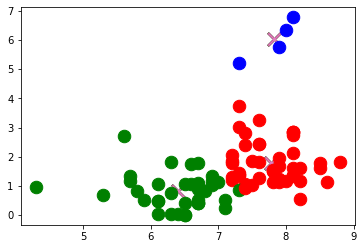

In [ ]:
# Como próximo passo, vamos colorir os pontos com base em seus grupos e especificar o centro de cada grupo com um marcador (x).
# Temos três clusters, uma cor para cada cluster
colors = ["g.","r.","b.","y.","p"]

# Criando uma matriz de cada conjunto de dados para percorrer os pontos
dataset_array = np.array(selected_dataset)

# plotando o ponto em um gráfico de dispersão
for i in range(len(dataset_array)):
    plt.plot(dataset_array[i][0], dataset_array[i][1], colors [labels[i]], markersize =25);
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150);

Vemos então três clusters na figura: o primeiro cluster (azul) são os filmes com pontuação GOB baixa (não venderam bem) e pontuação baixa no IMDB (não foram bem classificados pelos usuários do IMDB).

O segundo grupo inclui os filmes com uma pontuação IMDB muito boa, mas não uma pontuação GOB muito alta. O terceiro cluster inclui poucos filmes com pontuações IMDB entre 7 e 8 e GOB muito alto.

Lembrando que esse é um subconjunto de filmes, você pode ter uma interpretação melhor aplicando o algoritmo em todos os filmes.

In [ ]:
# E você, será que consegue descobrir alguma relação entre a pontuação do IMDB e as curtidas de filmes no Facebook? 
# O que mais podemos descobrir a partir desse dataset, não somente a partir de clustering?

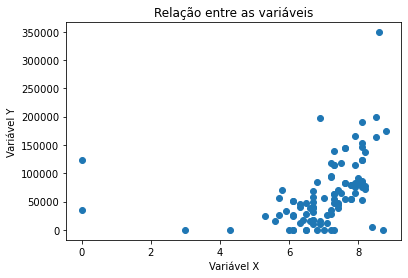

In [ ]:
plt.scatter(df["imdb_score"], df["movie_facebook_likes"])
plt.xlabel("Variável X")
plt.ylabel("Variável Y")
plt.title("Relação entre as variáveis")
plt.show()

In [ ]:
correlacao = df["imdb_score"].corr(df["movie_facebook_likes"])
print("Correlação:", correlacao)


Correlação: 0.35618762210513827


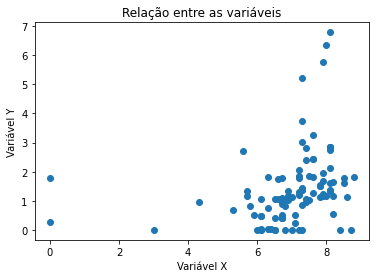

In [ ]:
plt.scatter(df["imdb_score"], df["GOB"])
plt.xlabel("Variável X")
plt.ylabel("Variável Y")
plt.title("Relação entre as variáveis")
plt.show()

In [ ]:
correlacao = df["imdb_score"].corr(df["GOB"])
print("Correlação:", correlacao)

Correlação: 0.2858254539074612


#### **Como escolher a quantidade ideal de clusters?**

Método do cotovelo - Elbow Method

Um dos métodos mais amplamente utilizados para essa finalidade é o método do cotovelo em conjunto com o algoritmo de agrupamento K-Means. Vamos explorar um exemplo prático que demonstra como essas técnicas podem ser aplicadas a conjuntos de dados aleatórios.

Inicialmente, criamos dois conjuntos de atributos, Feature_1 e Feature_2, contendo 100 exemplos cada. Esses dados são gerados aleatoriamente usando a biblioteca numpy em Python.

In [ ]:
df = pd.DataFrame(np.random.random_sample((100,2)),columns= ['Feature_1','Feature_2'])
df.head()

,Feature_1,Feature_2
0,0.325192,0.133835
1,0.958091,0.385807
2,0.035616,0.794133
3,0.721095,0.592552
4,0.982172,0.055861


Como parte do processo de preparação dos dados, é essencial normalizá-los para garantir que todas as características tenham a mesma escala. Utilizamos o StandardScaler da biblioteca scikit-learn para normalizar os dados Feature_1 e Feature_2.

In [ ]:
# Normalização via StdScaler

mms = StandardScaler()
mms.fit(df)
normalized_data = mms.transform(df)
normalized_data = np.array(normalized_data).reshape(-1, 1)


O próximo passo é determinar o número ideal de clusters para nosso conjunto de dados. Para isso, aplicamos o método do cotovelo, que envolve calcular a inércia (ou soma dos quadrados das distâncias dos pontos para o centróide mais próximo) para diferentes valores de k (número de clusters).

Plotamos a inércia em função do número de clusters e observamos o ponto onde a inércia começa a diminuir mais lentamente, conhecido como "cotovelo". Esse é o número ideal de clusters.

In [12]:
plt.figure(figsize=(8,5))

K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No de Clusters')
plt.ylabel('Soma_das_distancias_quadradas')
plt.title('Metodo do Cotovelo para o k Ótimo')
plt.show()

NameError: name 'plt' is not defined

Com o número ideal de clusters determinado (neste exemplo, assumimos 3 clusters), aplicamos o algoritmo KMeans aos nossos dados normalizados.

O KMeans agrupa os pontos de dados em k clusters, minimizando a inércia dentro de cada cluster. Cada ponto é atribuído ao cluster cujo centróide está mais próximo.


In [ ]:
km = KMeans(n_clusters=3)
km = km.fit(normalized_data)

In [ ]:
#adicionando ao dataset
df['labels'] = km.labels_
df.head()

,Feature_1,Feature_2,labels
0,0.325192,0.133835,1
1,0.958091,0.385807,0
2,0.035616,0.794133,2
3,0.721095,0.592552,0
4,0.982172,0.055861,0


**Visualizando nossos clusters com um box plot**

Para entender melhor a distribuição dos dados em cada cluster, utilizamos boxplots para representar graficamente os valores das Features 1 e 2 para cada grupo. Isso nos permite identificar padrões e diferenças entre os clusters.

No nosso exemplo, criamos quatro grupos com base nas características das Features 1 e 2:

Alto valor de Feature_1 e alto valor de Feature_2
Alto valor de Feature_1 e baixo valor de Feature_2
Baixo valor de Feature_1 e alto valor de Feature_2
Baixo valor de Feature_1 e baixo valor de Feature_2


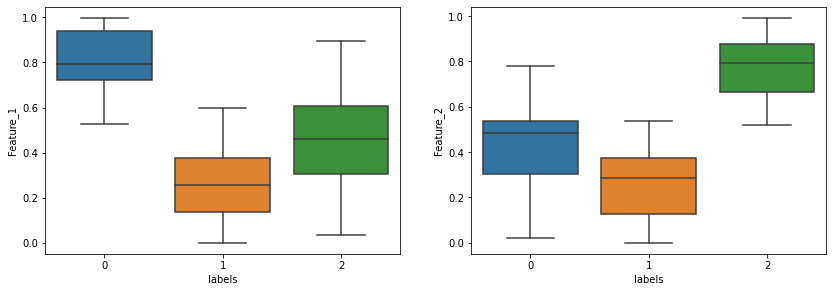

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x="labels", y="Feature_1", data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x="labels", y="Feature_2", data=df)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

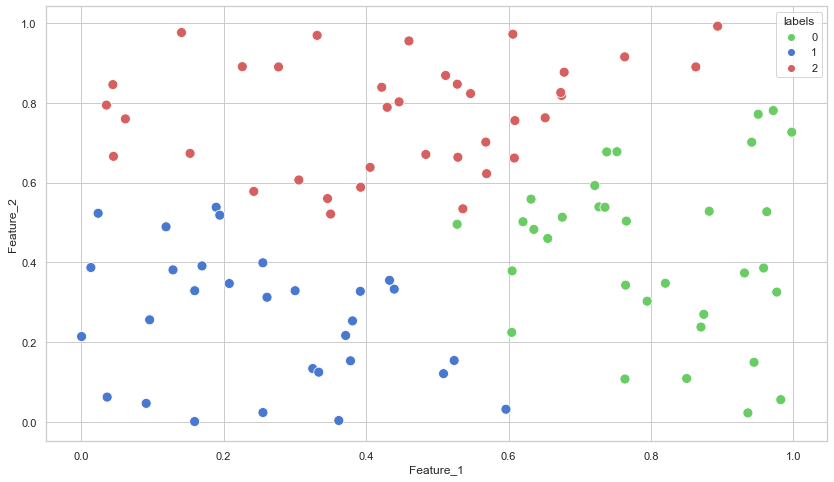

In [ ]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x="Feature_1", y="Feature_2", hue="labels",s=100,
                     data=df,palette={0: 'g', 1 : 'b', 2 : 'r',3 : 'y'})

Essa análise nos fornece insights sobre a estrutura dos dados e pode nos ajudar a tomar decisões informadas em uma variedade de aplicações, desde segmentação de mercado até otimização de processos.

Em resumo, a combinação do Método do Cotovelo com o algoritmo KMeans oferece uma poderosa ferramenta para explorar padrões em conjuntos de dados complexos e não rotulados.

#### 2.2 Hierarchical Clustering

#### 2.3 DBSCAN
